<a href="https://colab.research.google.com/github/Raneevk/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### IMPORTING LIBRARIES

In [2]:
#LETS IMPORT REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%lsmagic

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')


### MOUNTING DRIVE AND IMPORTING DATASET

In [3]:
#LETS MOUNT THE GOOGLE DRIVE FOR IMPORTING DATASET
from google.colab import drive
drive.mount("/content/drive")
path= "/content/drive/MyDrive/Colab Notebooks/CSV DATA/SeoulBikeData.csv"

Mounted at /content/drive


### IMPORTING DATASET FROM DRIVE

In [4]:
bike_df= pd.read_csv(path,encoding="latin")

### DATA PROFILING AND CLEANING 


### In this process we will perform examining, analyzing and cleaning of the Dataset and thereby create useful summaries from the data

In [5]:
#LETS CHECK THE SHAPE OF THE DATA SET
bike_df.shape

(8760, 14)

The dataset contains 14 columns and 8760 observations

In [6]:
#LETS TAKE A LOOK AT THE TOP 5 OBSERVATIONS 
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
#NOW LETS CHECK WHETHER THE DATATYPES ARE IN CORRECT FORMAT OR NOT
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### Observation
The data type for date is given as object so we have to convert it into date format

In [8]:
#column names/independent variables
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
#brief description of the data_frame
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Observations
The dataset contains hourly observations for exact one year.That is 365*24= 8760 hours. So we can say that the quality of dataset is really good. 

## Feature Understanding

## Now we can take a look at all available features and try to understand what it is exactly.
1. Date: The corresponding date of each day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

2. Rented Bike Count: Number of rented bikes per hour which is our dependent variable and we need to predict that, type : int
Hour: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

3. Temperature(°C): Temperature in Celsius, type : Float

4. Humidity(%): Humidity in the air that indicates amount of water vapour present in air in %, type : int

5. Wind speed (m/s) : Speed of the wind in m/s, type : Float

6. Visibility (10m): Visibility in m, type : int

7. Dew point temperature(°C): the temperature to which a parcel of moist air must be cooled at constant atmospheric pressure and constant water vapour content in order for saturation to occur., type : Float

8. Solar Radiation (MJ/m2): Sun contribution, type : Float

9. Rainfall(mm): Amount of raining in mm, type : Float

10. Snowfall (cm): Amount of snowing in cm, type : Float

11. Seasons: *Season of the year, type : str, there are 4 season's in the data *.

12. Holiday: If the day is holiday period or not, type: str

13. Functioning Day: If the day is a Functioning Day or not, type : str


## Preprocessing the dataset

### **What is preprocessing and importance of preprocessing the data**
  Data preprocessing is essential before its actual use. Data preprocessing is the concept of changing the raw data into a clean data set. The dataset is preprocessed in order to check missing values, noisy data, and other inconsistencies before executing it to the algorithm.
  Most of the real world dataset often contains lot of missing values which maybe due to data corruption or failed to record.Any way if missing datas are present in dataset our machine learning algorithm will not work properly.So we have to check for missing datas first.

In [10]:
#LETS CHECK MISSING VALUES
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [11]:
bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Great!! There are no missing values present in this dataset so we can say that its an absolutely clean dataset.

## Finding duplicate values
Duplicates values will cause waste of time and money,the main reason for duplicate values are multiple entry errors or any mistake in data collection method.

In [12]:
#LETS CHECK WHETHER ANY DUPLICATE VALUES ARE PRESENT IN OUR DATASET OR NOT
bike_df.duplicated().sum()

0

There are no duplicate values present in our dataset





## Changing column names
Here we are going to change the complex column names just for simplicity

In [13]:
#rename the complex column names
bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'},inplace=True)

The date is provided as object datatype so python read it as a string only,but since date column is important for this current project, we have to convert it into datetime format.We can extract perticular month,day and year from date column and its possible to find the corelation between rented_bike_count and month of the year.Also we can create a column as weekend to find the trend in bike usage at weekends. 

## Breaking date column and creating weekend column

In [14]:
#CHANGING DATE COLUMN INTO "DAY","MONTH" AND "YEAR"

bike_df['Date'] = bike_df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [15]:
bike_df["Year"] = bike_df["Date"].dt.year
bike_df["Month"] = bike_df["Date"].dt.month_name()
bike_df["Day"] = bike_df["Date"].dt.day_name()


In [16]:
bike_df["Day"].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [17]:
bike_df["Month"].unique()

array(['December', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'], dtype=object)

In [18]:
#LETS CREATE A COLUMNS AS WEEKEND 

bike_df["Weekend"] = bike_df["Day"].apply(lambda x: 1 if x=="Saturday" or x=="Sunday" else 0 )

In [19]:
#LETS TAKE A LOOK AT NEW DATAFRAME 
bike_df.head()


,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Month,Day,Weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,0


The year column contains only two unique datas that is 2017 and 2018 .The day column contain values from 1 to 30 that is day of each month.Since the whole dataset contain observations of exact one year from 2017 to 2018 ,the year column has no importance also since we extract weekend days using date column we can now drop "Date","Year" and "Day" columns.

In [20]:
#LETS DROP UNNECESSORY COLUMNS
bike_df = bike_df.drop(columns=["Day","Year","Date"],axis=1)

In [21]:
#LETS TAKE A LOOK AT INFO
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  Month                  8760 non-null   object 
 14  Weekend                8760 non-null   int64  
dtypes: f

## Changing datatypes

From info we can see that "Hour","month" and "weekend" are given as integers but actually those are categorical variables.We have to change data types of those variables inorder to avoid corelation errors.

In [22]:
#CHANGING DATATYPES
columns= ["Hour","Month","Weekend"]
for col in columns:
  bike_df[col] = bike_df[col].astype("category")


In [23]:
#LETS VERIFY THE INFO NOW
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  Month                  8760 non-null   category
 14  Weekend                8760 non-null   c

## **EXPLORATORY DATA ANALYSIS (EDA)**

### First of all lets check the distribution of our dependent variable that is Rented_Bike_Count

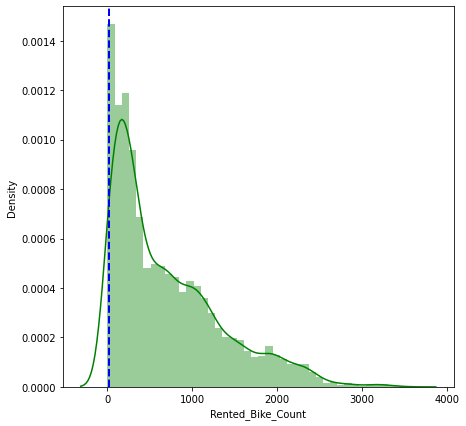

In [24]:
#statistical distribution of dependent variable
plt.figure(figsize=(7,7))
ax=sns.distplot(bike_df['Rented_Bike_Count'],color="g")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='blue', linestyle='dashed', linewidth=2)

## **Observation**
1. We can observe that the distribution has a skewness towards right direction.



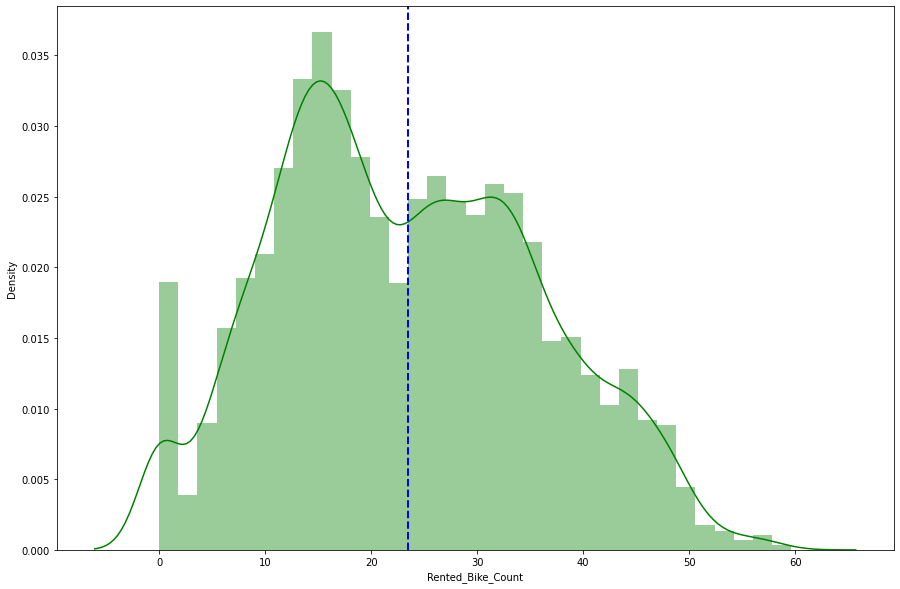

In [25]:
#LETS APPLY SQRT TO MINIMIZE SKEWNESS
plt.figure(figsize=(15,10))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color="g")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='blue', linestyle='dashed', linewidth=2)

Lets examine categorical variables

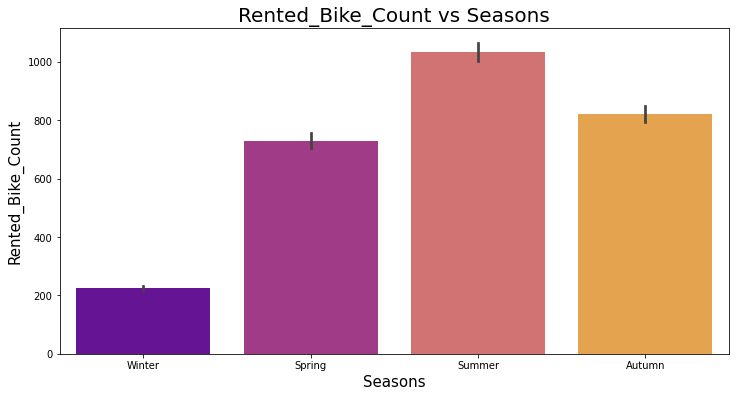

In [26]:
#Finding relation between seasons and rented bike count.

plt.figure(figsize=(12,6))
x0= sns.barplot(x ='Seasons', y ='Rented_Bike_Count', data = bike_df, palette ='plasma')
x0.set_xlabel("Seasons",fontsize=15)
x0.set_ylabel("Rented_Bike_Count",fontsize=15)
x0.set_title("Rented_Bike_Count vs Seasons",fontsize=20)
plt.show()

## **Observation**
1. Rented_bike_count is maximum in summer and minimum in winter season.



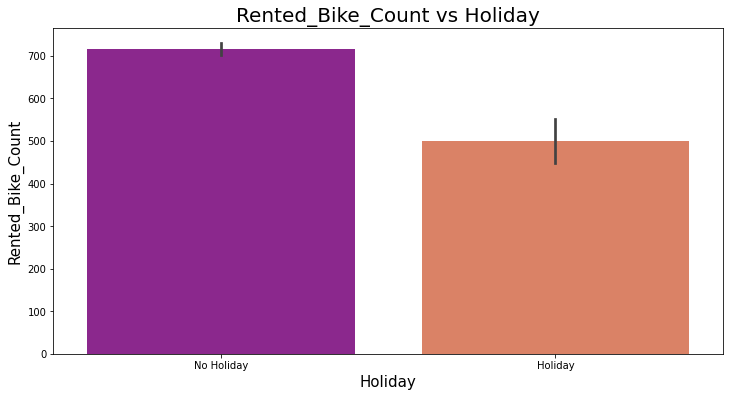

In [27]:
plt.figure(figsize=(12,6))
x0= sns.barplot(x ='Holiday', y ='Rented_Bike_Count', data = bike_df, palette ='plasma')
x0.set_xlabel("Holiday",fontsize=15)
x0.set_ylabel("Rented_Bike_Count",fontsize=15)
x0.set_title("Rented_Bike_Count vs Holiday",fontsize=20)
plt.show()

## **Observation**
1. Rented_bike_count is maximum in Working days than hollidays.



[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

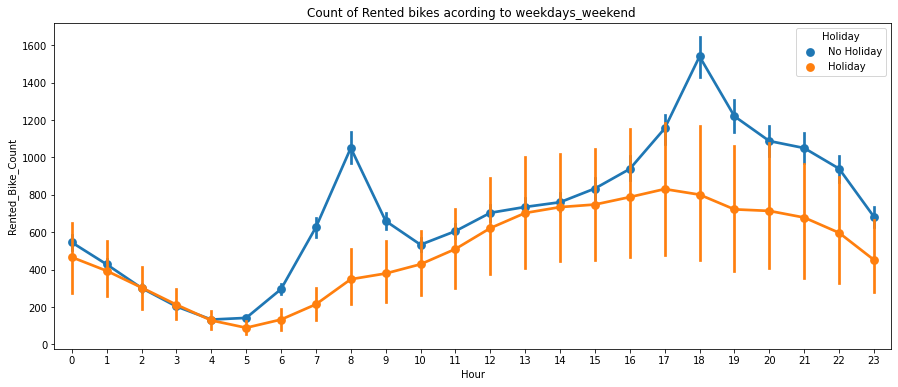

In [28]:
#Lets find hourly demand for bikes in holiday and nonholiday
fig,ax=plt.subplots(figsize=(15,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

## **Observation**
1. For nonholidays we can see a peak deamand at almost 8am at morning and 6pm at evening that indicates that most of the working people depends rented bike for transportation.




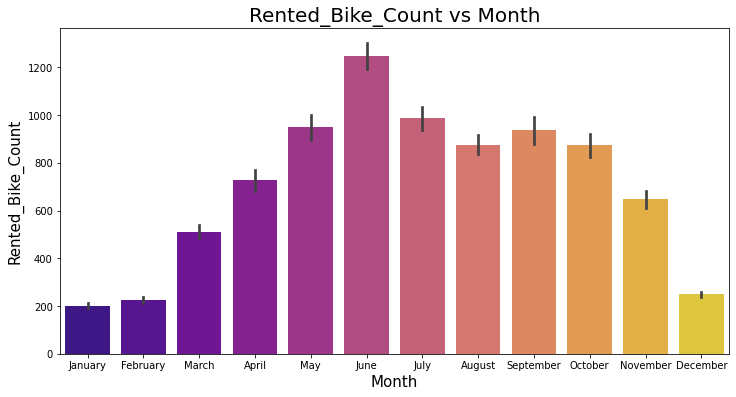

In [29]:
#finding how demand varies with month
plt.figure(figsize=(12,6))
Months = ['January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November','December']
x0= sns.barplot(x ='Month', y ='Rented_Bike_Count', data = bike_df, palette ='plasma',order=Months)
x0.set_xlabel("Month",fontsize=15)
x0.set_ylabel("Rented_Bike_Count",fontsize=15)
x0.set_title("Rented_Bike_Count vs Month",fontsize=20)
plt.show()

## **Observation**
1. The demand for bikes increasing from month 1 to month 6 then its start decreasing.Maximum bike_rent_count can be found on month 6 and minimum on month 1,2 and 12.
2. From month 5 to month 10 the rented_bike_count is comparitively high.




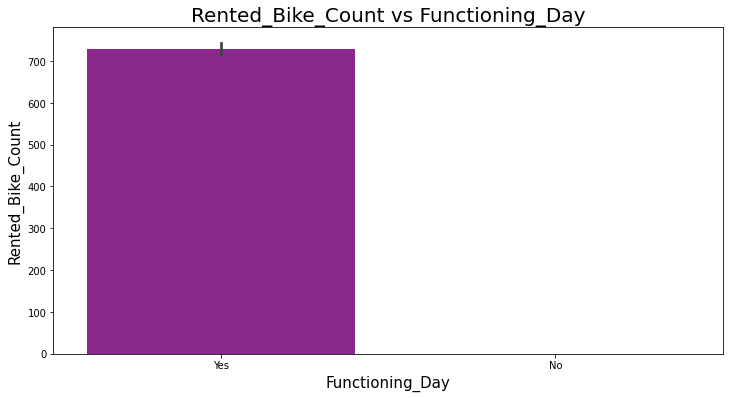

In [30]:
plt.figure(figsize=(12,6))
x0= sns.barplot(x ='Functioning_Day', y ='Rented_Bike_Count', data = bike_df, palette ='plasma')
x0.set_xlabel("Functioning_Day",fontsize=15)
x0.set_ylabel("Rented_Bike_Count",fontsize=15)
x0.set_title("Rented_Bike_Count vs Functioning_Day",fontsize=20)
plt.show()

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning day ')]

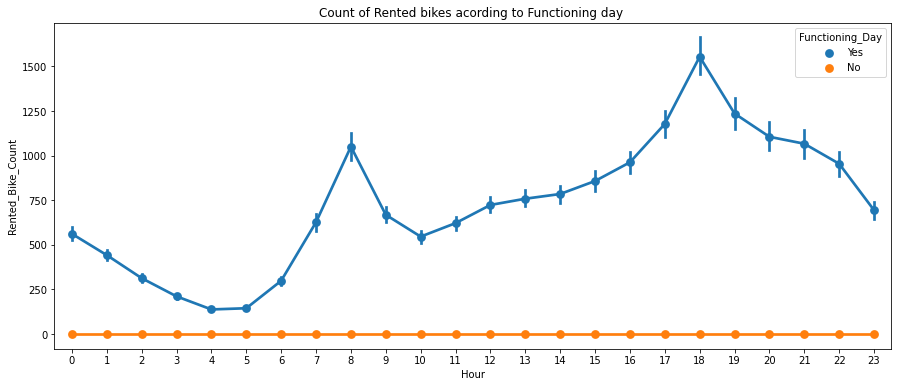

In [31]:
#Lets find hourly demand for bikes in holiday and nonholiday
fig,ax=plt.subplots(figsize=(15,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning day ')

## **Observation**
1. Functioning_day follow same trend as that of nonholiday.But for nonfunctioning_days the Rented_bike_count is absolutely zero.




## **Exploring Numerical Variables**

### **Numerical Data**
Numerical data refers to the data that is in the form of numbers, and not in any language or descriptive form. Often referred to as quantitative data, numerical data is collected in number form and stands different from any form of number data types due to its ability to be statistically and arithmetically calculated.

In [32]:
#Finding numerical_columns
numerical_columns = bike_df.select_dtypes(include=["int64","float64"]).columns
numerical_columns_indexed = pd.Index(numerical_columns)
numerical_columns_indexed


Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

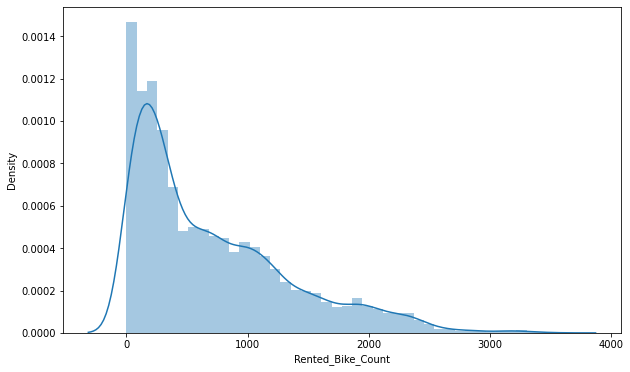

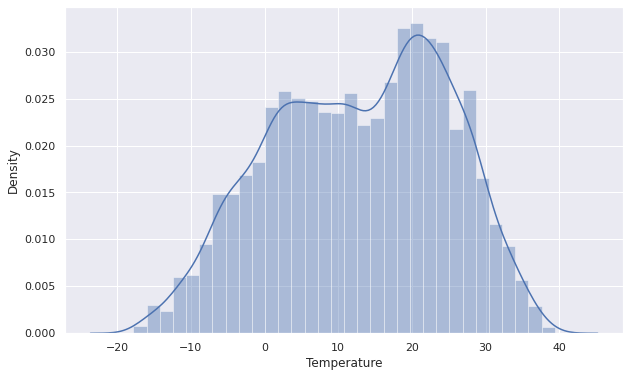

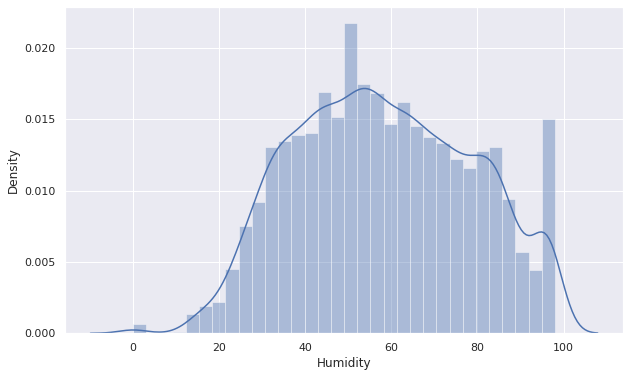

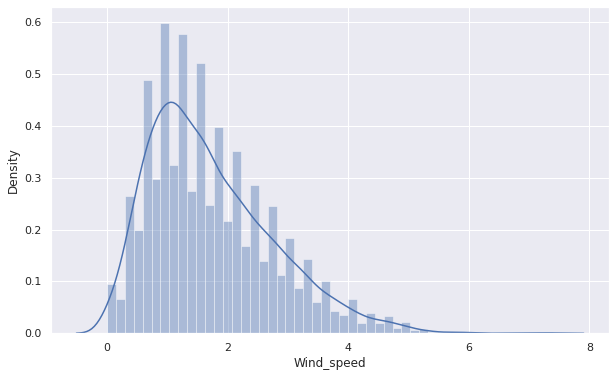

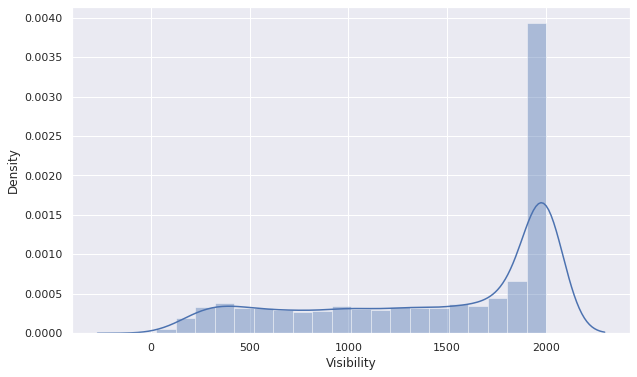

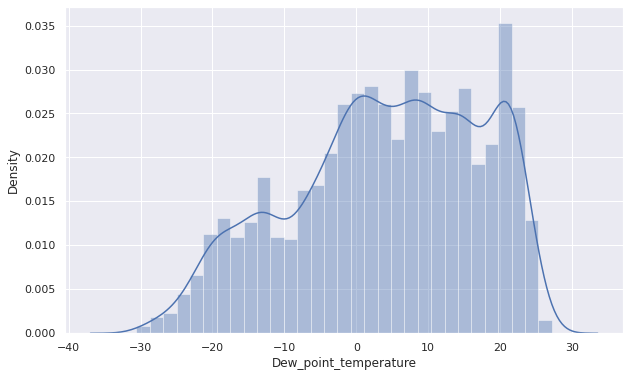

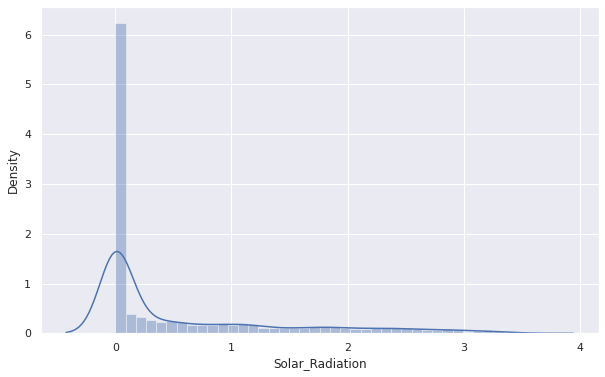

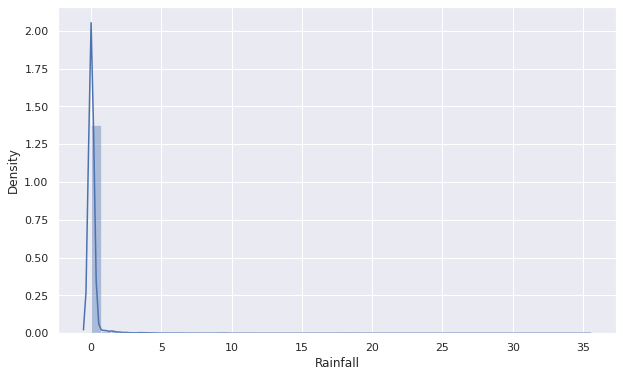

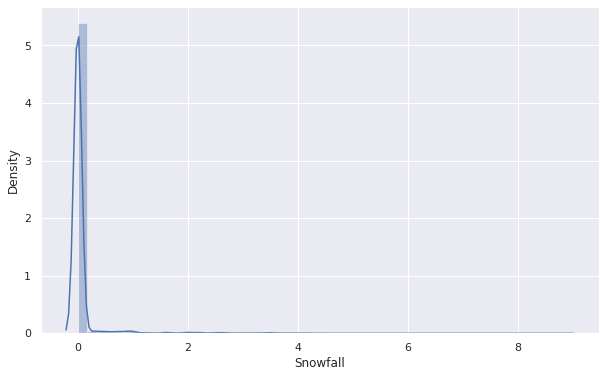

In [33]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_columns_indexed:
  plt.figure(figsize=(10,6))
  sns.distplot(x=bike_df[col])
  sns.set_theme(); np.random.seed(0)
  plt.xlabel(col)
plt.show()

**Lets examine Numerical variables**

Temperature

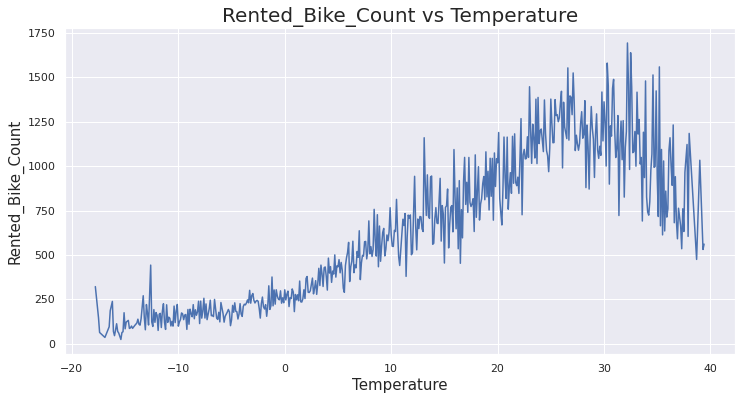

In [34]:
#LETS PLOT A GRAPHICAL REPRESENTATION OF RELATIONSHIP BETWEEN TEMPERATURE AND RENTED BIKE COUNT

plt.figure(figsize=(12,6))
temp_df = bike_df.groupby('Temperature').mean()['Rented_Bike_Count']
x0 = sns.lineplot(data=temp_df)
x0.set_xlabel("Temperature",fontsize=15)
x0.set_ylabel("Rented_Bike_Count",fontsize=15)
x0.set_title("Rented_Bike_Count vs Temperature",fontsize=20)
plt.show()


## **Observation**
1. We can see an increasing trend in rented_bike_count along with temperature upto almost 35 degree celsius.After 35 degree celsius the rented_bike_count decreases.
2. Maximum rented_bike_count is from 25 to 35 degree celsius.




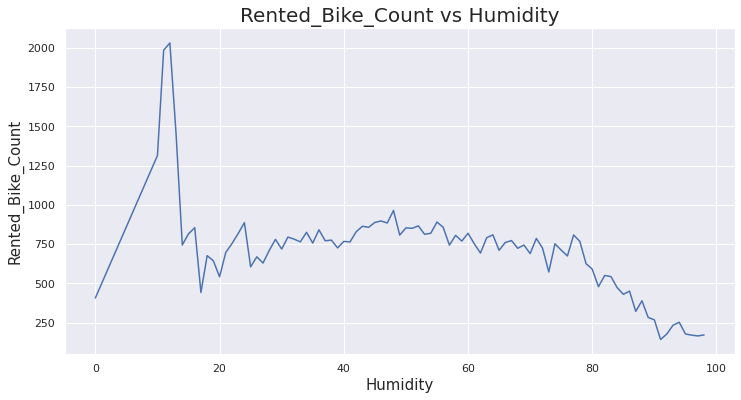

In [35]:
#LETS PLOT A GRAPHICAL REPRESENTATION OF RELATIONSHIP BETWEEN Humidity AND RENTED BIKE COUNT

plt.figure(figsize=(12,6))
temp_df = bike_df.groupby('Humidity').mean()['Rented_Bike_Count']
x1 = sns.lineplot(data=temp_df)
x1.set_xlabel("Humidity",fontsize=15)
x1.set_ylabel("Rented_Bike_Count",fontsize=15)
x1.set_title("Rented_Bike_Count vs Humidity",fontsize=20)
plt.show()

## **Observation**
1. Rented bike count is maximum when humidity level is almost 15%




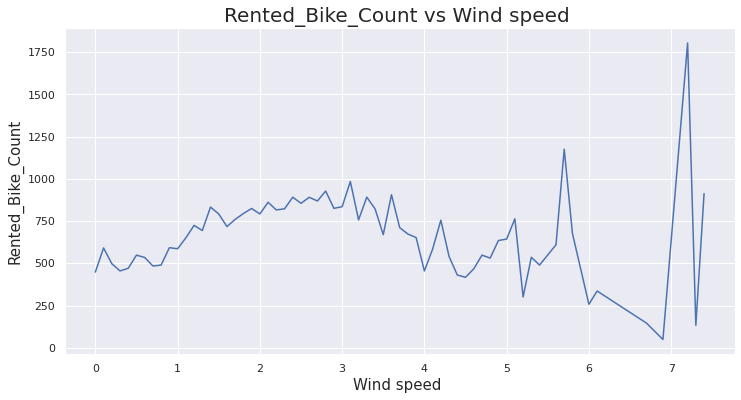

In [36]:
#LETS PLOT A GRAPHICAL REPRESENTATION OF RELATIONSHIP BETWEEN WIND SPEED  AND RENTED BIKE COUNT

plt.figure(figsize=(12,6))
temp_df = bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count']
x2 = sns.lineplot(data=temp_df)
x2.set_xlabel("Wind speed ",fontsize=15)
x2.set_ylabel("Rented_Bike_Count",fontsize=15)
x2.set_title("Rented_Bike_Count vs Wind speed ",fontsize=20)
plt.show()

## **Observation**
1. Rented bike count is maximum when Wind_speed is almost 7.2 m/s




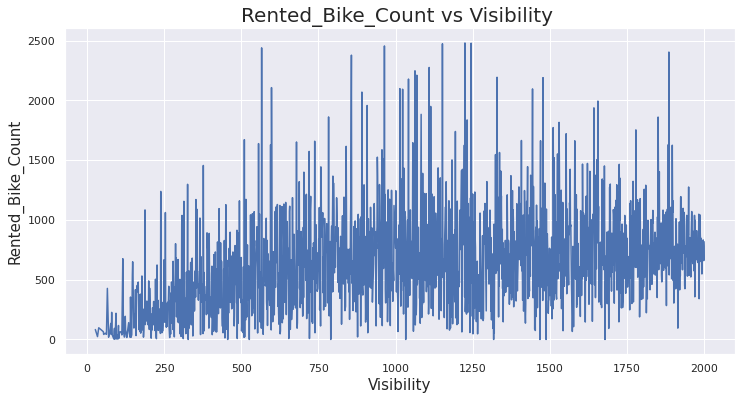

In [37]:
#LETS PLOT A GRAPHICAL REPRESENTATION OF RELATIONSHIP BETWEEN VISIBILITY  AND RENTED BIKE COUNT

plt.figure(figsize=(12,6))
temp_df = bike_df.groupby('Visibility').mean()['Rented_Bike_Count']
x3 = sns.lineplot(data=temp_df)
x3.set_xlabel("Visibility",fontsize=15)
x3.set_ylabel("Rented_Bike_Count",fontsize=15)
x3.set_title("Rented_Bike_Count vs Visibility ",fontsize=20)
plt.show()

## **Observation**
1. It seems like Visibility does not make any effect on rented bike count




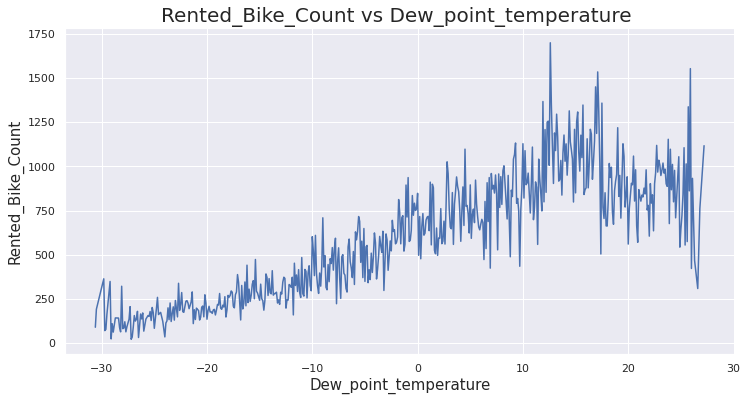

In [38]:
#LETS PLOT A GRAPHICAL REPRESENTATION OF RELATIONSHIP BETWEEN DEW POINT TEMPERATURE  AND RENTED BIKE COUNT

plt.figure(figsize=(12,6))
temp_df = bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count']
x4 = sns.lineplot(data=temp_df)
x4.set_xlabel("Dew_point_temperature",fontsize=15)
x4.set_ylabel("Rented_Bike_Count",fontsize=15)
x4.set_title("Rented_Bike_Count vs Dew_point_temperature ",fontsize=20)
plt.show()

## **Observation**
1. There is an increasing trend in rented_bike_count upto almost 18 degree celsius .




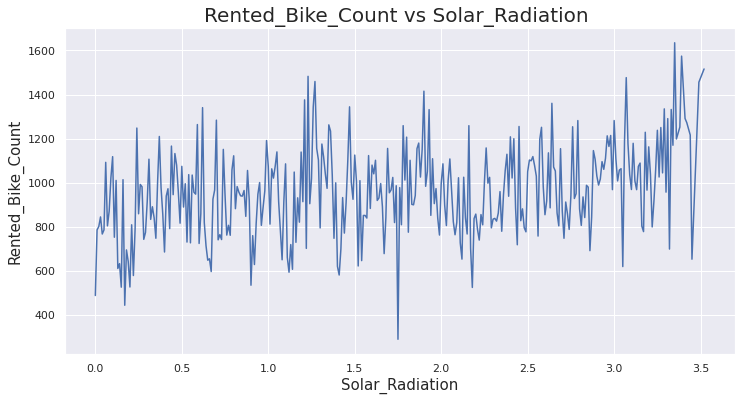

In [39]:
#LETS PLOT A GRAPHICAL REPRESENTATION OF RELATIONSHIP SOLAR RADIATION (MJ/m2)  AND RENTED BIKE COUNT

plt.figure(figsize=(12,6))
temp_df = bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_Count']
x5 = sns.lineplot(data=temp_df)
x5.set_xlabel("Solar_Radiation",fontsize=15)
x5.set_ylabel("Rented_Bike_Count",fontsize=15)
x5.set_title("Rented_Bike_Count vs Solar_Radiation ",fontsize=20)
plt.show()

## **Observation**
1. It seems like Solar_Radiation does not make any effect on rented bike count




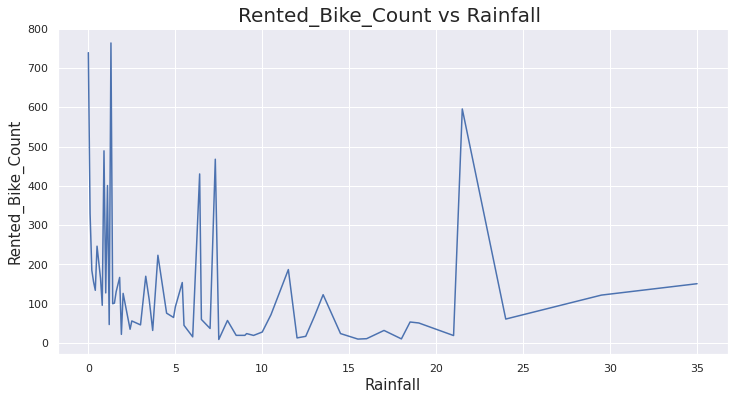

In [40]:
#LETS PLOT A GRAPHICAL REPRESENTATION OF RELATIONSHIP RAINFALL(mm)  AND RENTED BIKE COUNT

plt.figure(figsize=(12,6))
temp_df = bike_df.groupby('Rainfall').mean()['Rented_Bike_Count']
x6 = sns.lineplot(data=temp_df)
x6.set_xlabel("Rainfall",fontsize=15)
x6.set_ylabel("Rented_Bike_Count",fontsize=15)
x6.set_title("Rented_Bike_Count vs Rainfall ",fontsize=20)
plt.show()

## **Observation**
1. It seems like Rainfall does not make much effect on rented bike count but anyway we can see a spike when there is no rainfall or very less rainfall




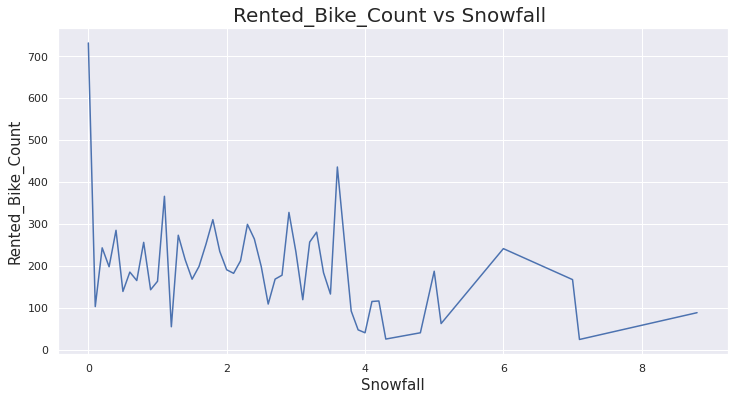

In [41]:
#LETS PLOT A GRAPHICAL REPRESENTATION OF RELATIONSHIP SNOWFALL(cm)  AND RENTED BIKE COUNT

plt.figure(figsize=(12,6))
temp_df = bike_df.groupby('Snowfall').mean()['Rented_Bike_Count']
x7 = sns.lineplot(data=temp_df)
x7.set_xlabel("Snowfall",fontsize=15)
x7.set_ylabel("Rented_Bike_Count",fontsize=15)
x7.set_title("Rented_Bike_Count vs Snowfall ",fontsize=20)
plt.show()

## **Observation**
1. It seems like Snowfall does not make much effect on rented bike count but anyway we can see a spike when there is no snowfall atall.




### Now Lets lets do regression plots to understand how datas are distributed about regression line

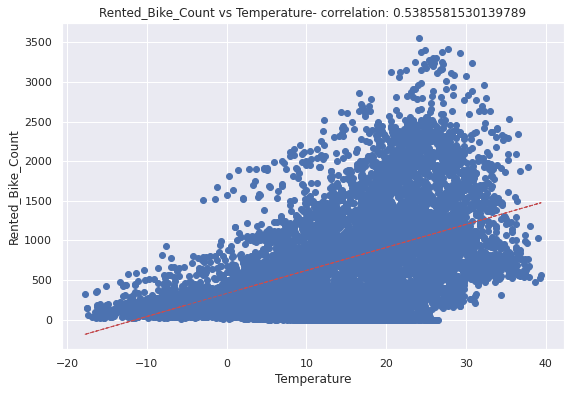

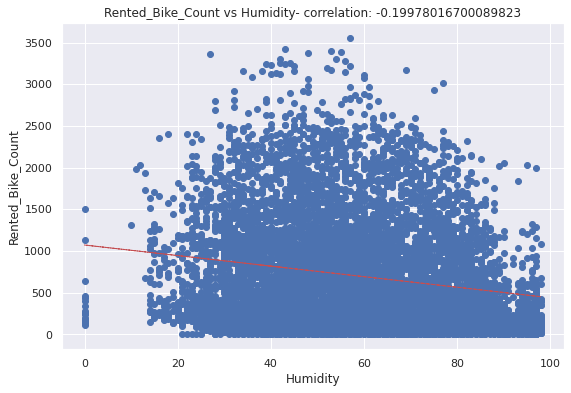

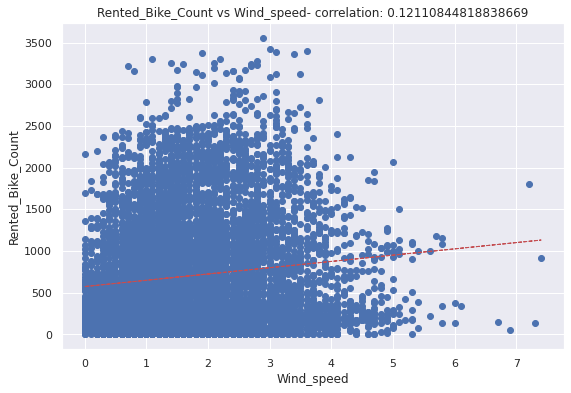

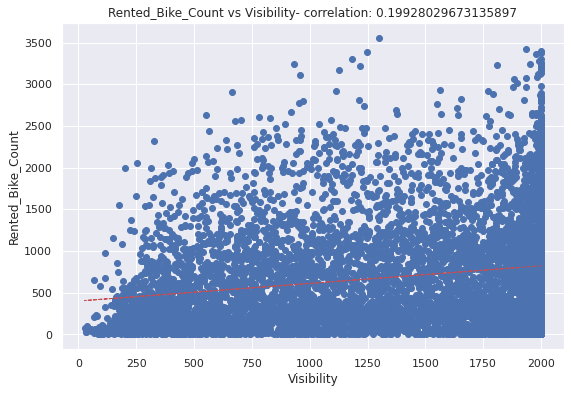

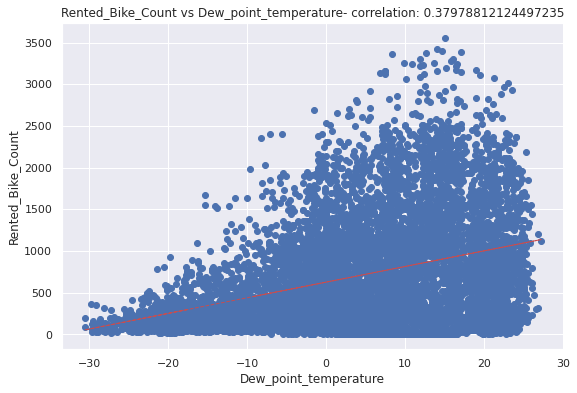

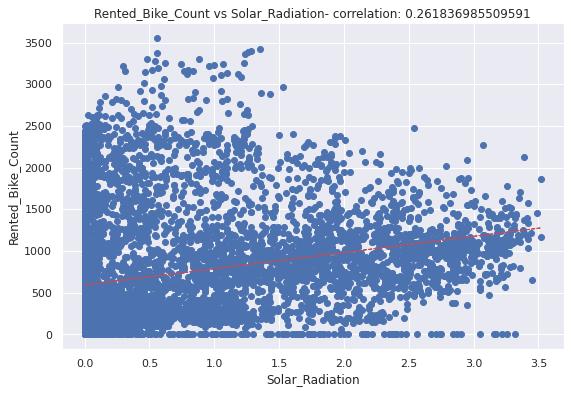

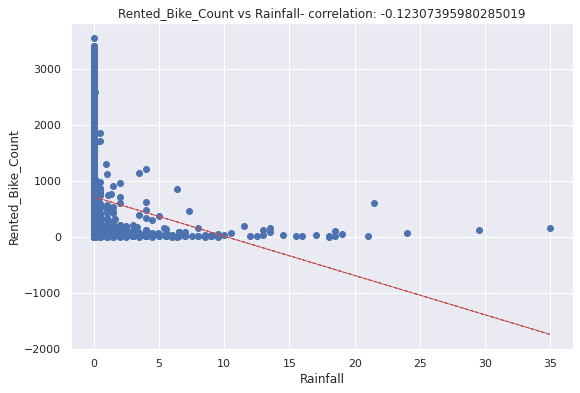

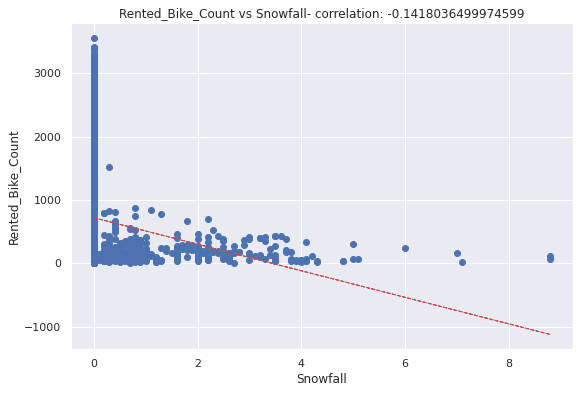

In [42]:
for col in numerical_columns_indexed[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    label = bike_df['Rented_Bike_Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented_Bike_Count')
    ax.set_title('Rented_Bike_Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(bike_df[col], bike_df['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(bike_df[col])

    plt.plot(bike_df[col], y_hat, "r--", lw=1)

plt.show()

## **Observation**
1. We can observe that temperature, wind_speed, visibility, dew_point_temperature, and solar radiation has positive correlation with rented_bike_count while humidity, rainfall and snowfall has negative correlation with target variable.




## Now lets plot heat map to analyse correlations and to find whether any multicolinearity present or not

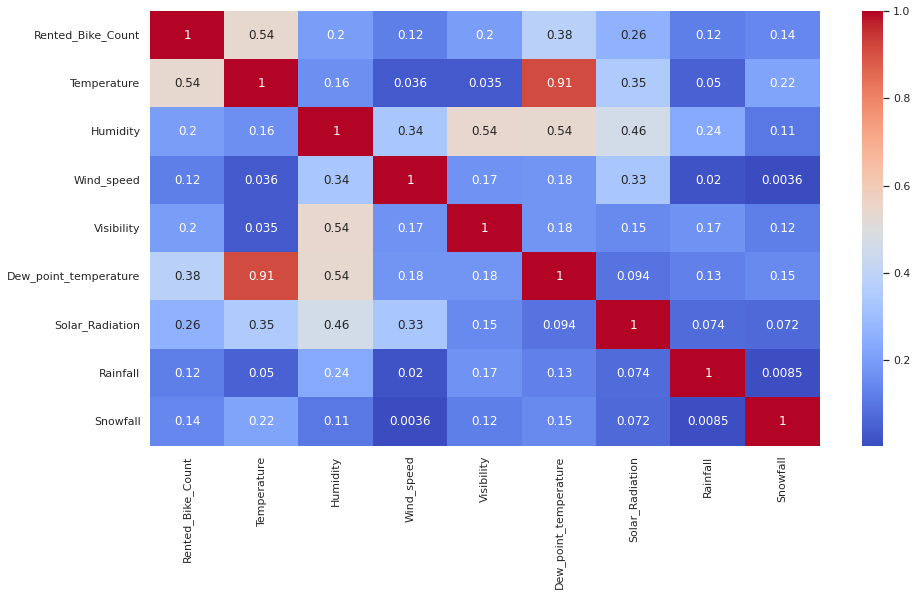

In [43]:
## Correlation heatmap
plt.figure(figsize=(15,8))
correlation = bike_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## **Observation**
1. We can observe multicolinearity between temperature and dew_point_temperature.
2. We can create a new feature by combining temperature and dew_point_temperature



## **Feature Engineering**

In [44]:
#CREATING NEW FEATURE BY ADDING DEW_POINT_TEMP AND TEMPERATURE
bike_df["Effective_Temp"] = bike_df["Temperature"] + bike_df["Dew_point_temperature"]
bike_df.head()


,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Weekend,Effective_Temp
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,0,-22.8
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,0,-23.1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,0,-23.7
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,0,-23.8
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,0,-24.6


## Feature Selection for Numerical Variables

In [45]:
#LETS CHECK VARIENCE INFLATION FACTOR FOR EACH VARIABLES
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [46]:
calc_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Rented_Bike_Count','Temperature', 'Dew_point_temperature']]])

,variables,VIF
0,Humidity,4.948927
1,Wind_speed,4.172802
2,Visibility,4.390699
3,Solar_Radiation,2.056034
4,Rainfall,1.078836
5,Snowfall,1.116727
6,Effective_Temp,2.166404


## **Observation**
1. The VIF factor for returned 6 variables are less than 10. So we can select these features for further processing.



In [47]:
numerical_features = ['Humidity', 'Wind_speed', 'Visibility', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Effective_Temp']

In [48]:
numerical_features_df = bike_df[numerical_features]

In [49]:
numerical_features_df.head()

,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Effective_Temp
0,37,2.2,2000,0.0,0.0,0.0,-22.8
1,38,0.8,2000,0.0,0.0,0.0,-23.1
2,39,1.0,2000,0.0,0.0,0.0,-23.7
3,40,0.9,2000,0.0,0.0,0.0,-23.8
4,36,2.3,2000,0.0,0.0,0.0,-24.6


In [50]:
#LETS FIND CATEGORICAL FEATURES
categorical_features = bike_df.describe(include=['object','category']).columns
categorical_features


Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Weekend'], dtype='object')

## Lets plot categorical variables against target variable

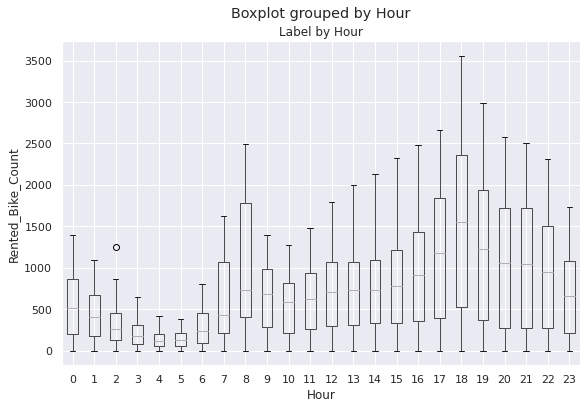

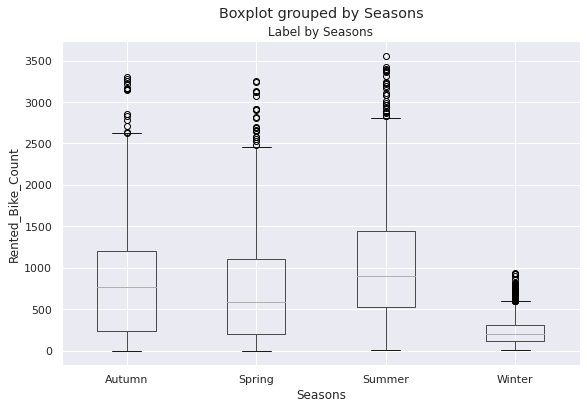

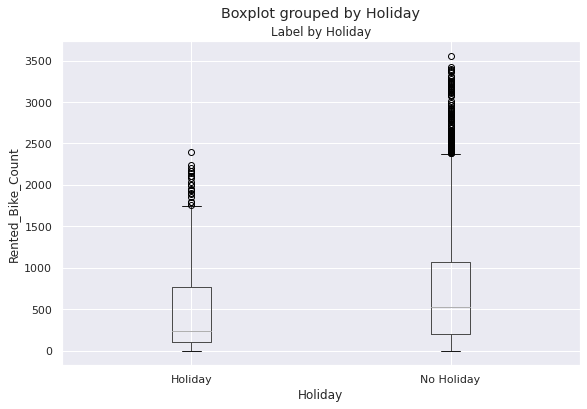

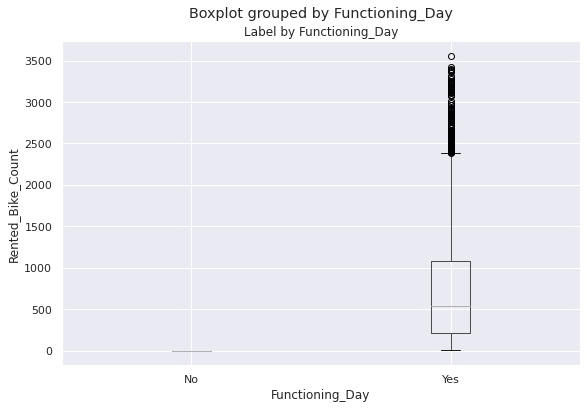

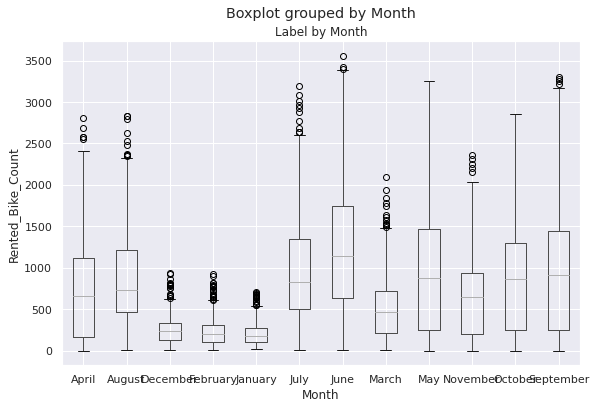

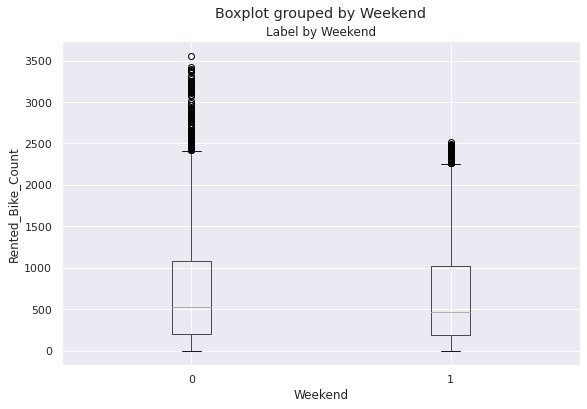

In [51]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_df.boxplot(column = 'Rented_Bike_Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented_Bike_Count")
plt.show()

In [52]:
bike_df["Weekend"].value_counts()

0    6264
1    2496
Name: Weekend, dtype: int64

## **One hot encoding**
Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

In [53]:
bike_df_copy = bike_df.drop(['Temperature','Dew_point_temperature'],axis=1)

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.columns.value_counts().sum()

48

In [54]:
bike_df_copy.columns

Index(['Rented_Bike_Count', 'Humidity', 'Wind_speed', 'Visibility',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Effective_Temp', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September', 'Weekend_1'],
      dtype='object')

In [55]:
features = ['Humidity', 'Wind_speed', 'Visibility',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Effective_Temp', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September', 'Weekend_1']
target_variable = 'Rented_Bike_Count'       

### **Train_Test split**

## Lets devide the data for training and testing,in the ratio of 4:1

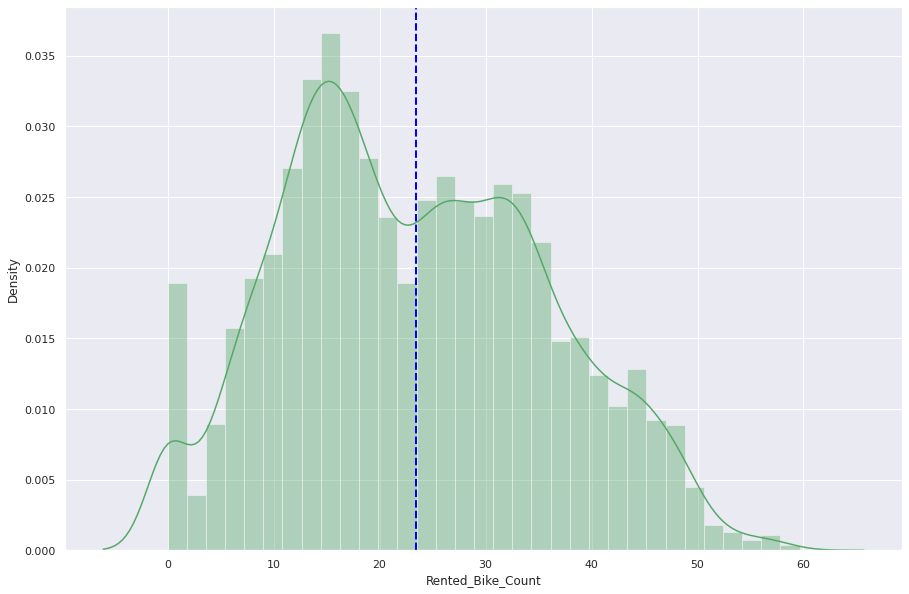

In [56]:
#LETS TAKE A LOOK AT THE DISTRIBUTION OF TARGET VARIABLE
plt.figure(figsize=(15,10))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df_copy['Rented_Bike_Count']), color="g")
ax.axvline(np.sqrt(bike_df_copy['Rented_Bike_Count']).mean(), color='blue', linestyle='dashed', linewidth=2)

In [57]:
from scipy.stats import zscore
#Applying zscore( since we already normalised our target variable we are not applying a sqrt transformation here)
X = bike_df_copy[features].apply(zscore)
y = y = np.sqrt(bike_df_copy['Rented_Bike_Count'])


In [58]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 47)
(1752, 47)


In [59]:
#Let us now implement our first model. We will be using LinearRegression from scikit library.
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [60]:
reg.score(X_train, y_train)

0.7760706549277346

In [61]:
reg.coef_

array([-3.86254130e+00, -3.85696459e-02,  6.92458697e-01,  8.87337930e-01,
       -1.68602046e+00, -5.04915580e-03,  6.68830491e+00, -3.87399877e-01,
       -9.72123701e-01, -1.43925637e+00, -1.88218691e+00, -1.81366764e+00,
       -8.01842712e-01,  4.41295775e-01,  1.50609864e+00,  2.46540254e-01,
       -6.55214886e-01, -7.03793109e-01, -5.59280047e-01, -5.89249353e-01,
       -5.81611163e-01, -3.50692885e-01,  3.97802031e-02,  7.77922414e-01,
        2.07796579e+00,  1.36241721e+00,  1.20012026e+00,  1.25904907e+00,
        1.01556496e+00,  3.08002761e-01,  3.28708200e+11,  2.20613599e+12,
       -1.14664112e+13,  7.46517388e-01,  5.12491338e+00, -1.20543025e+12,
        7.62746642e+12,  7.28148887e+12,  7.62746642e+12, -1.20543025e+12,
       -1.18760232e+12, -2.45260157e-01,  5.60184810e-01,  2.07930564e+11,
        2.11051956e+11,  2.07930564e+11, -6.30533007e-01])

In [62]:
len(reg.coef_)

47

In [63]:
reg.intercept_

23.49383992214767

In [64]:
y_pred = reg.predict(X_test)
y_pred

array([16.1130063 , 22.9242856 , 19.87899751, ..., 20.40089253,
       33.96546772, 27.5807021 ])

## Lets check evaluation matrices for training data set

In [65]:
#get the y_pred_train and y_pred_test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [100]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 34.55971507880346
RMSE : 5.878751149589805
MAE : 4.436044260806089
R2 : 0.7760706549277346
Adjusted R2 : 0.7698941999873611


In [263]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

## Lets check evaluation matrices for testing data set

In [66]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 33.74572289438533
RMSE : 5.809106893007335
MAE : 4.416499963114598
R2 : 0.7857227449607573
Adjusted R2 : 0.7798125155083838


## **Observation**
1. We got R2 value of 77% and adjusted R2 value of 76% so we can say that our model is performing well



In [261]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

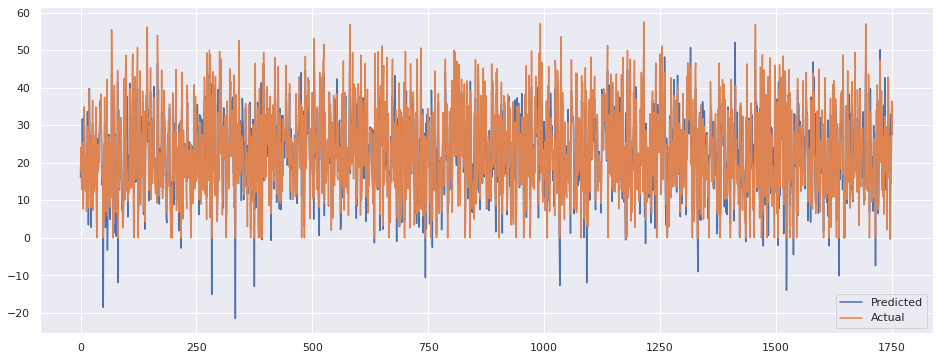

In [67]:
#LETS VISUALISE ACTUAL DATA AND PREDICTED DATA 
plt.figure(figsize=(16,6))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **LASSO REGRESSION**

In [68]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [69]:
lasso.score(X_train, y_train)

0.7760718034564833

In [70]:
lasso.coef_

array([-3.86087441e+00, -4.05795749e-02,  6.91936002e-01,  8.85596079e-01,
       -1.68788909e+00, -4.80081736e-03,  6.68252189e+00, -3.86315023e-01,
       -9.70616031e-01, -1.44028817e+00, -1.88340953e+00, -1.81275471e+00,
       -8.00219244e-01,  4.43543600e-01,  1.50495621e+00,  2.47887127e-01,
       -6.54457127e-01, -7.01855360e-01, -5.58337077e-01, -5.86381557e-01,
       -5.79372939e-01, -3.50529547e-01,  4.11043749e-02,  7.79966091e-01,
        2.07898550e+00,  1.36192605e+00,  1.20102613e+00,  1.26082363e+00,
        1.01615561e+00,  3.08632848e-01, -2.02067704e-01, -0.00000000e+00,
       -8.34224726e-01,  7.46837123e-01,  5.12347665e+00, -1.40958461e+00,
        0.00000000e+00, -7.58479292e-01, -5.78200058e-01, -7.99786871e-01,
        9.48064035e-01, -2.44216674e-01,  5.61779873e-01,  9.17745754e-01,
        1.06632144e+00,  2.14005071e-01, -6.29758922e-01])

In [71]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [72]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -35.16756350966244


In [97]:
# Create an instance of Lasso Regression with updated alpha value
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0014, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.7857058131157462 0.7760709701783804


In [74]:
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

## Lets check evaluation matrices for training data set

In [75]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 34.559666425186876
RMSE : 5.878747011497167
MAE : 4.43573200188509
R2 : 0.7760709701783804
Adjusted R2 : 0.7698945239333006


In [264]:
# storing the training set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [98]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso

array([16.12818249, 22.91570419, 19.8706549 , ..., 20.40052536,
       33.94733436, 27.56753029])

## Lets check evaluation matrices for testing data set

In [101]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 33.74838942728324
RMSE : 5.809336401628266
MAE : 4.416184966981184
R2 : 0.7857058131157462
Adjusted R2 : 0.7797951166465209


In [265]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

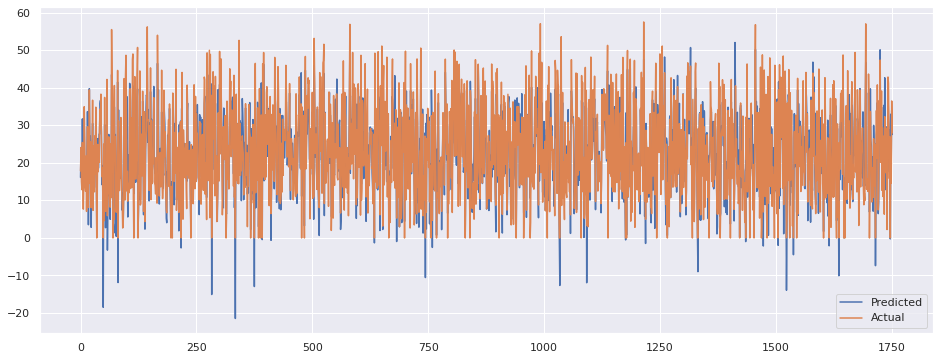

In [77]:
plt.figure(figsize=(16,6))
plt.plot((y_pred_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **RIDGE REGRESSION**

In [81]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [83]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -35.15138564099875


In [84]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=5)

In [85]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=5)

In [86]:
#check the score
ridge.score(X_train, y_train)

0.7760696155328572

## Lets check evaluation matrices for training data set

In [99]:
#get the y_pred_train_ridge and y_pred_test_ridge value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [88]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 34.55987549186056
RMSE : 5.878764793037782
MAE : 4.4361530801081335
R2 : 0.7760696155328572
Adjusted R2 : 0.7698931319237283


In [266]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

## Lets check evaluation matrices for testing data set

In [102]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 33.75393185701932
RMSE : 5.809813409828178
MAE : 4.417343665928119
R2 : 0.7856706200148661
Adjusted R2 : 0.7797589528439146


In [267]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

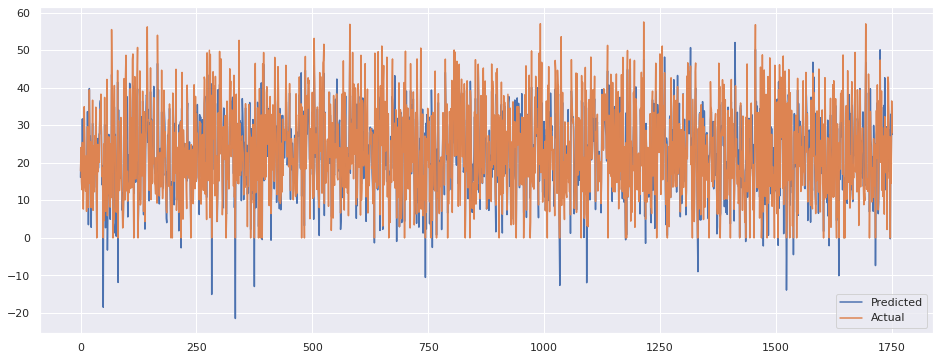

In [104]:
#Plot the figure
plt.figure(figsize=(16,6))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### **ELASTIC NET REGRESSION**

In [89]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.5)

In [90]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.001)

In [91]:
#check the score
elasticnet.score(X_train, y_train)

0.7760702576368741

In [92]:
#get the y_pred_train_en and y_pred_test_en value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

## Lets check evaluation matrices for training data set

In [93]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 34.55977639394256
RMSE : 5.878756364567472
MAE : 4.436021465241966
R2 : 0.7760702576368741
Adjusted R2 : 0.7698937917383606


In [268]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [94]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [95]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.5}

Using  {'alpha': 0.001, 'l1_ratio': 0.5}  the negative mean squared error is:  -35.16748402090858


## Lets check evaluation matrices for testing data set

In [105]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 33.75245742766643
RMSE : 5.8096865171596335
MAE : 4.41699855513466
R2 : 0.7856799822879895
Adjusted R2 : 0.7797685733487498


In [269]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

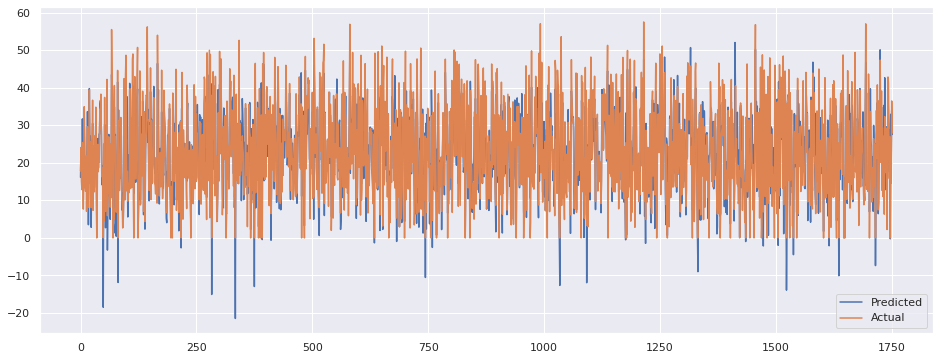

In [96]:
#Plot the figure
plt.figure(figsize=(16,6))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### **DECISION TREE**

In [212]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=10,
                      max_features=10, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=10,
                      max_leaf_nodes=100)

## Lets check evaluation matrices for training data set

In [213]:
#get the y_train and y-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [214]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.7465176302780001
MSE : 39.12072565685912
RMSE : 6.254656318044911
MAE : 4.595058361577675
R2 : 0.7465176302780001
Adjusted R2 : 0.7395260390943534


In [270]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

## Lets check evaluation matrices for testing data set

In [215]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 44.843635903753
RMSE : 6.696539098949024
MAE : 4.907652284787026
R2 : 0.715253656366799
Adjusted R2 : 0.7073997372642401


In [271]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

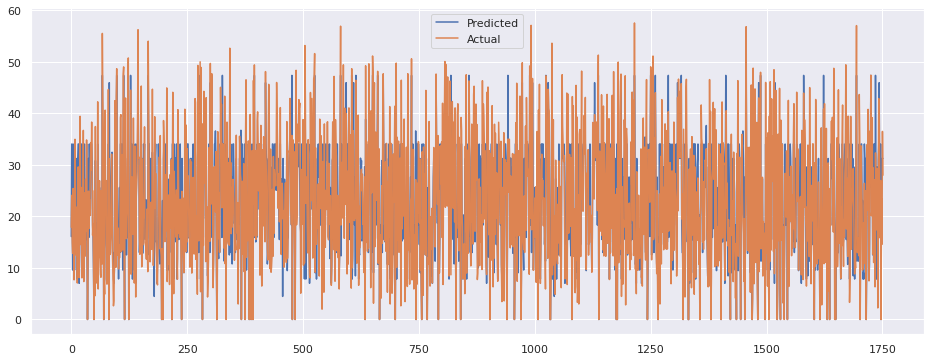

In [217]:
#Plot the figure
plt.figure(figsize=(16,6))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### **RANDOM FOREST**

In [218]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

## Lets check evaluation matrices for training data set

In [219]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [220]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9893818730183448
MSE : 1.6387286938124868
RMSE : 1.2801283895814852
MAE : 0.7975303106829525
R2 : 0.9893818730183448
Adjusted R2 : 0.9890890021450245


In [272]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

## Lets check evaluation matrices for testing data set

In [221]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 12.92842614035475
RMSE : 3.595612067556058
MAE : 2.2014190273907563
R2 : 0.9179075916078915
Adjusted R2 : 0.9156433056956679


In [273]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [222]:
rf_model.feature_importances_

array([1.65692992e-01, 1.11638477e-02, 1.14837790e-02, 8.60374758e-02,
       2.58670912e-02, 1.97401098e-03, 8.56748380e-02, 4.83019780e-03,
       9.10427244e-03, 1.31981183e-02, 1.76383309e-02, 1.71348252e-02,
       8.12723539e-03, 3.97334454e-03, 1.05478575e-02, 9.27932129e-04,
       2.63322245e-03, 1.22811394e-03, 2.94777413e-04, 2.33234800e-04,
       3.24607071e-04, 1.23507548e-03, 3.77521534e-03, 1.04585055e-02,
       2.78660684e-02, 1.85376509e-02, 1.67713029e-02, 2.50007158e-02,
       2.25216409e-02, 5.54144636e-03, 5.15799776e-03, 1.35757815e-03,
       1.81585263e-01, 4.90320513e-03, 1.53739326e-01, 8.87637969e-04,
       6.97142038e-04, 1.48738716e-04, 1.91841428e-04, 5.12683149e-04,
       2.31856710e-03, 1.40686258e-02, 1.50677531e-03, 7.23043569e-04,
       9.50556269e-04, 1.03657635e-03, 2.04167162e-02])

In [224]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df

,Feature,Feature Importance
0,Humidity,0.165693
1,Wind_speed,0.011164
2,Visibility,0.011484
3,Solar_Radiation,0.086037
4,Rainfall,0.025867
5,Snowfall,0.001974
6,Effective_Temp,0.085675
7,Hour_1,0.004830
8,Hour_2,0.009104
9,Hour_3,0.013198


In [225]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [238]:
importance_df.sort_values(by=['Feature Importance'],ascending=False).reset_index(drop=True)

,Feature,Feature Importance
0,Effective_Temp,0.21
1,Functioning_Day_Yes,0.18
2,Humidity,0.16
3,Seasons_Winter,0.09
4,Solar_Radiation,0.07
5,Rainfall,0.06
6,Hour_18,0.03
7,Hour_4,0.03
8,Hour_5,0.02
9,Hour_21,0.02


In [227]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [228]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

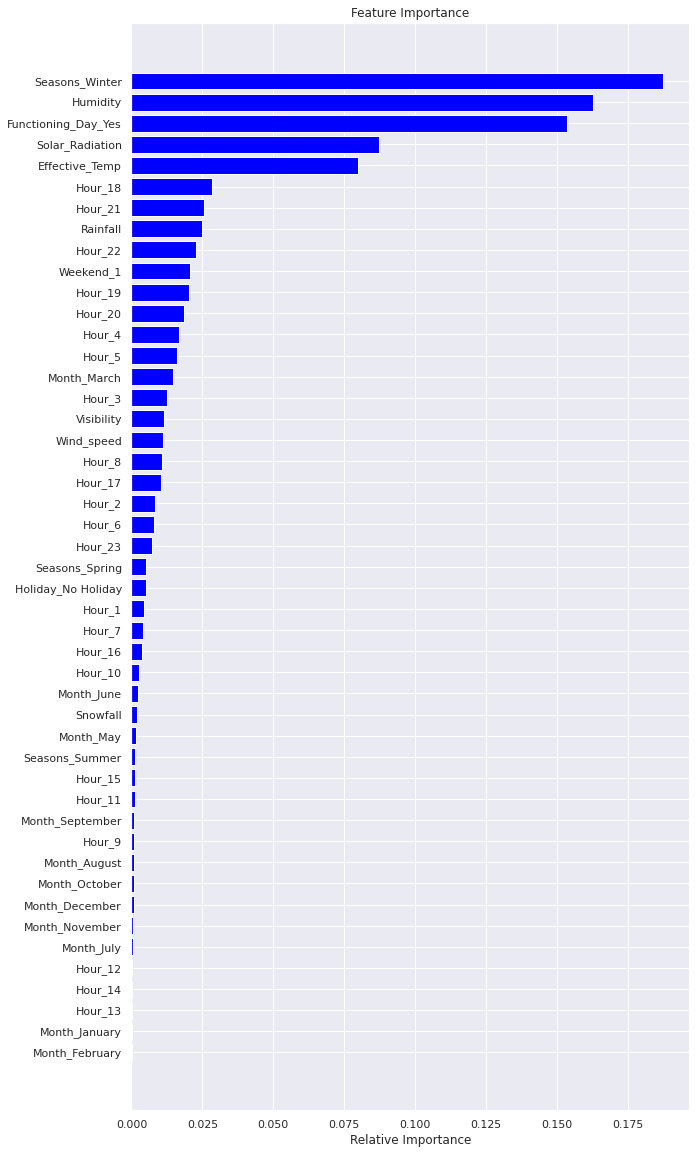

In [229]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **GRADIENT BOOSTING**

In [230]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [231]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)


## Lets check evaluation matrices for training data set

In [232]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8698739517928062
MSE : 20.082759358403745
RMSE : 4.4813791803867415
MAE : 3.38126276780827
R2 : 0.8698739517928062
Adjusted R2 : 0.8662847943598613


In [274]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

## Lets check evaluation matrices for testing data set

In [233]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 22.697073690636007
RMSE : 4.764144591701222
MAE : 3.584496695688675
R2 : 0.8558790201924497
Adjusted R2 : 0.8519038523221709


In [275]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

In [234]:
gb_model.feature_importances_

array([1.57723254e-01, 1.89232977e-03, 1.77781016e-03, 6.57313403e-02,
       6.42194522e-02, 0.00000000e+00, 2.09340767e-01, 1.99217279e-04,
       5.69968265e-03, 1.36157612e-02, 2.63661742e-02, 2.12805243e-02,
       5.77511277e-03, 1.97705108e-04, 7.62872015e-03, 0.00000000e+00,
       3.71820319e-03, 1.59802571e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.13158216e-04, 7.27645022e-03,
       3.43239052e-02, 1.52862794e-02, 1.22633381e-02, 1.85132199e-02,
       1.49094842e-02, 7.00581299e-04, 6.81701224e-05, 2.32818455e-04,
       8.94813992e-02, 2.88223579e-03, 1.79756280e-01, 5.24381403e-04,
       6.21893157e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.93737381e-03, 4.37024475e-03, 4.51155619e-04, 2.23190576e-03,
       5.09192294e-03, 9.44217158e-05, 1.68053008e-02])

In [235]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [236]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [239]:
importance_df.sort_values(by=['Feature Importance'],ascending=False).reset_index(drop=True)

,Feature,Feature Importance
0,Effective_Temp,0.21
1,Functioning_Day_Yes,0.18
2,Humidity,0.16
3,Seasons_Winter,0.09
4,Solar_Radiation,0.07
5,Rainfall,0.06
6,Hour_18,0.03
7,Hour_4,0.03
8,Hour_5,0.02
9,Hour_21,0.02


In [240]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [241]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

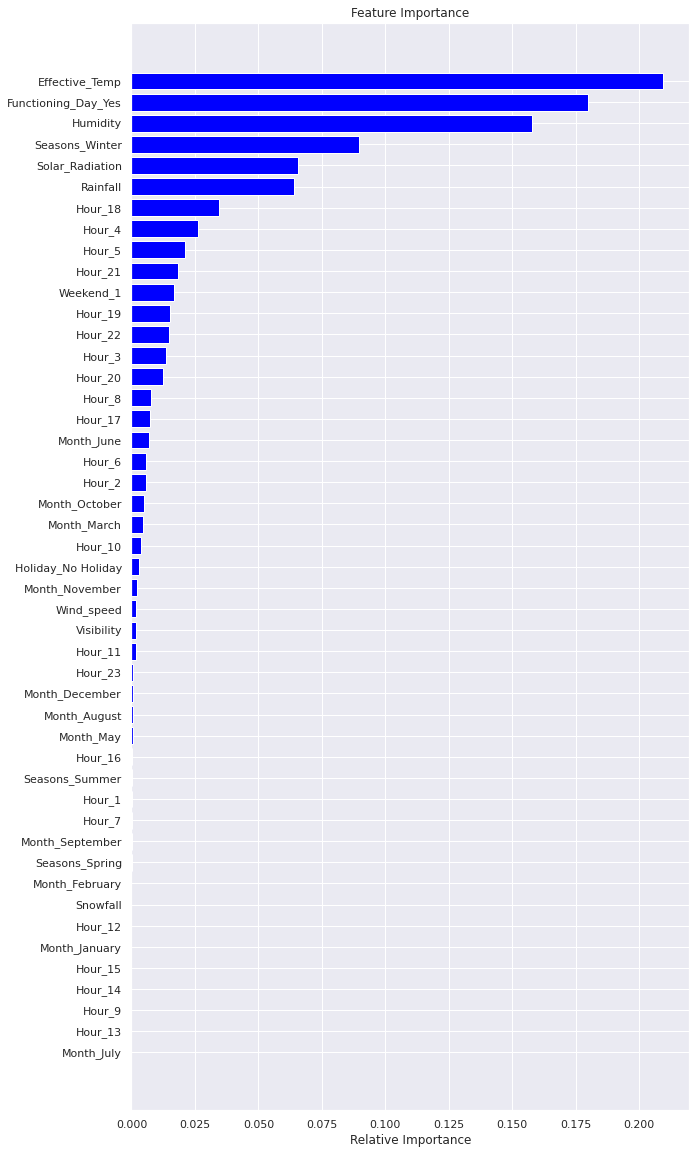

In [242]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

### **HYPERPARAMETER TURNING**

### Gradient Boosting Regressor with GridSearchCV

In [243]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [244]:
param_dict


{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

### **Importing Gradient Boosting Regressor**

In [245]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.4s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [246]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [247]:
gb_optimal_model = gb_grid.best_estimator_

In [248]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [249]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [250]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9510459172578005
MSE : 7.555236456251868
RMSE : 2.7486790384204314
MAE : 1.872903990607857
R2 : 0.9510459172578005
Adjusted R2 : 0.9496956579333384


In [276]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [251]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 12.381406488956404
RMSE : 3.5187222807372
MAE : 2.3727243738661845
R2 : 0.9213810353305525
Adjusted R2 : 0.9192125544975337


In [277]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [252]:
gb_optimal_model.feature_importances_

array([1.74587415e-01, 5.44101248e-03, 5.98964440e-03, 6.26657248e-02,
       3.83582268e-02, 1.42839843e-03, 1.49550922e-01, 1.11159493e-03,
       8.36004405e-03, 1.57704211e-02, 2.43846438e-02, 2.22730962e-02,
       6.94508677e-03, 5.40022946e-03, 9.62093077e-03, 3.81543455e-04,
       3.40453541e-03, 1.70832346e-03, 1.13509430e-04, 1.88775714e-04,
       5.80702452e-05, 1.89564041e-04, 1.18698990e-03, 9.12455969e-03,
       3.07412073e-02, 1.78482232e-02, 1.56294090e-02, 2.00338941e-02,
       1.76406481e-02, 3.81848414e-03, 5.42980976e-03, 7.21904385e-04,
       1.30226453e-01, 2.06798742e-03, 1.65460981e-01, 2.58253766e-03,
       8.71557224e-04, 3.54573901e-05, 2.36869230e-04, 3.11024250e-04,
       4.49725137e-03, 4.49074693e-03, 1.56251498e-03, 5.98571534e-04,
       5.47200890e-03, 3.29142758e-04, 2.11500544e-02])

In [253]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [254]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [256]:
importance_df.sort_values(by=['Feature Importance'],ascending=False).reset_index(drop=True)

,Feature,Feature Importance
0,Humidity,0.17
1,Functioning_Day_Yes,0.17
2,Effective_Temp,0.15
3,Seasons_Winter,0.13
4,Solar_Radiation,0.06
5,Rainfall,0.04
6,Hour_18,0.03
7,Hour_22,0.02
8,Hour_21,0.02
9,Hour_20,0.02


In [257]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [258]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

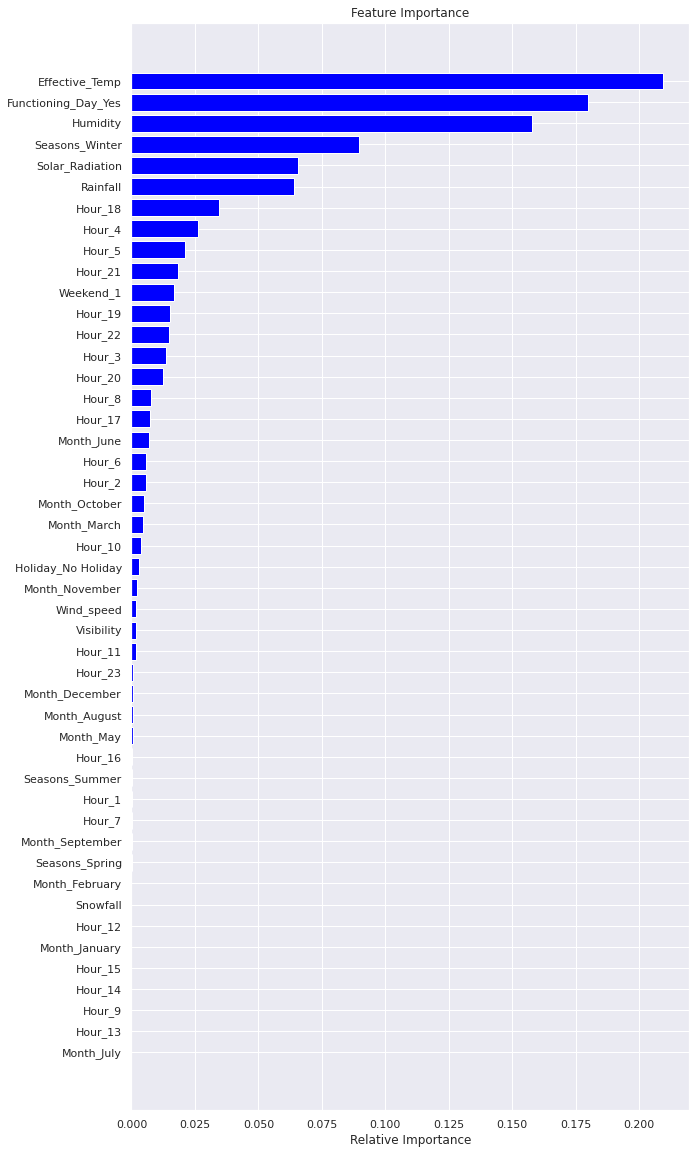

In [259]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **CONCLUSION**

Lets look back what we did from starting to end .At first we imported our dataset and perform EDA on it.We found that the dataset is very clean,no null values are present.Then we converted the date column into datetime format and created one column representing weekend.We analyse the distribution of dependend variable that is "rented bike count".We did squireroot transformation to convert in into more normalised form.Then we found correlation between each variables,and found varince inflation factor for each numerical variables to check whether any independent variable need to be droped.We also did some feature engineering by combining temperature and dewpoint temperature.In case of categorical variables we did one hot encoding.At last we applied different machine learning algorithms to our dataset and also applied various methods to improve the performance of our ML algorithms like random forest,gradient boosting etc.
Now lets look how different ML algorithms performed on this dataset.

In [278]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   4.436  34.560  5.879   
             1                Lasso regression   4.416  33.748  5.809   
             2                Ridge regression   4.417  33.754  5.810   
             3          Elastic net regression   4.417  33.752  5.810   
             4        Dicision tree regression   4.908  44.844  6.697   
             5        Random forest regression   2.201  12.928  3.596   
             6    Gradient boosting regression   3.584  22.697  4.764   
             7  Gradient Boosting gridsearchcv   2.373  12.381  3.519   
Test set     0               Linear regression   4.436  34.560  5.879   
             1                Lasso regression   4.416  33.748  5.809   
             2                Ridge regression   4.417  33.754  5.810   
             3      Elastic net regression Test  4.417  33.752  5.810   
             4        Dicision tree regression   4.908  44.844  6.697   
             5        Random forest regression   2.201  12.928  3.596   
             6    Gradient boosting regression   3.584  22.697  4.764   
             7  Gradient Boosting gridsearchcv   2.373  12.381  3.519   

                R2_score  Adjusted R2  
Training set 0     0.776         0.77  
             1     0.786         0.78  
             2     0.786         0.78  
             3     0.786         0.78  
             4     0.715         0.71  
             5     0.918         0.92  
             6     0.856         0.85  
             7     0.921         0.92  
Test set     0     0.776         0.77  
             1     0.786         0.78  
             2     0.786         0.78  
             3     0.786         0.78  
             4     0.715         0.71  
             5     0.918         0.92  
             6     0.856         0.85  
             7     0.921         0.92

1. Almost all algorithms performed really well on both training dataset and 
testing dataset so we can say that varience is less and no issues of overfittings are present.
2. Both "Random forest regression" and "Gradient Boosting regression(gridsearch cv) has highest R2 score.
3. Performance on "Decision Tree" algorithm is comparitively less with an R2 score of 71%.

We see that while analysing feature importance value as well as regression coefficients,our prediction algorithms are mostly dependend on contineous numerical variables like temperature and seasons.So there are chances when the weather condition changes drastically our algorithm may fails to predict the target variable.  